<a href="https://colab.research.google.com/github/ankitkumarhello20/sql-injection-detection-using-Machine-Learning-Techniques/blob/main/Sql_injection_detection_by_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sql Injection Detection by Machine Learning Techniques**

*Final project of Database Management System Course*


# **1. Objective:**
SQL injection is a code injection technique in which malicious SQL statements are inserted into an entry field for execution (e.g. to dump the database contents to the attacker).The objective of this project is to train ensemble machine learning models. Both injected and normal sql queries to form a dataset along with plain text as we also want our model to differentiate between query and plaint text and from them required queries and queries-based features are extracted. The performance level of each model is measured and compared. We have implemented the model prescribed by the research paper which would be cited in refercences

*This project is worked on Google Collaboratory.*



## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'Sql_injected_queries_features_extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [154]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Loading the data
url='https://raw.githubusercontent.com/ankitkumarhello20/sql-injection-dataset/main/SqlQueriesData.csv'
data0 = pd.read_csv(url,encoding= 'unicode_escape')
data0.head()

,Query,Data,Singlequotes,Doublequotes,Punctuations,1-linecmt,Mulline-cmt,Spaces,Safekywrd,Harmflkywrd,...,Nulls,Hex-dec,Db_info,Roles,Ntwr_cmds,Lang_cmds,Alphabets,Digits,Spl_char,Label
0,SELECT contain ( s ) FROM hurt SELECT chair (...,1,0,0,4,0,0,12,3,0,...,0,0,0,0,0,2,34,0,0,0
1,SELECT tight FROM tears,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,1,20,0,0,0
2,SELECT * FROM inch,1,0,0,0,0,0,4,2,0,...,0,0,0,0,0,1,14,0,0,0
3,SELECT * FROM long WHERE contain NOT IN ( '...,1,6,0,10,0,0,13,3,0,...,0,0,0,0,0,1,46,0,6,0
4,SELECT COUNT ( ProductID ) FROM Products;,1,0,0,3,0,0,7,1,0,...,0,0,0,0,0,1,32,0,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [155]:
data0.shape

(15800, 23)

In [156]:
#Listing the features of the dataset
data0.columns

Index(['Query', 'Data', 'Singlequotes', 'Doublequotes', 'Punctuations',
       '1-linecmt', 'Mulline-cmt', 'Spaces', 'Safekywrd', 'Harmflkywrd',
       'Percentages', 'Log_oprtr', 'Operator', 'Nulls', 'Hex-dec', 'Db_info',
       'Roles', 'Ntwr_cmds', 'Lang_cmds', 'Alphabets', 'Digits', 'Spl_char',
       'Label'],
      dtype='object')

In [157]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15800 entries, 0 to 15799
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Query         15800 non-null  object
 1   Data          15800 non-null  int64 
 2   Singlequotes  15800 non-null  int64 
 3   Doublequotes  15800 non-null  int64 
 4   Punctuations  15800 non-null  int64 
 5   1-linecmt     15800 non-null  int64 
 6   Mulline-cmt   15800 non-null  int64 
 7   Spaces        15800 non-null  int64 
 8   Safekywrd     15800 non-null  int64 
 9   Harmflkywrd   15800 non-null  int64 
 10  Percentages   15800 non-null  int64 
 11  Log_oprtr     15800 non-null  int64 
 12  Operator      15800 non-null  int64 
 13  Nulls         15800 non-null  int64 
 14  Hex-dec       15800 non-null  int64 
 15  Db_info       15800 non-null  int64 
 16  Roles         15800 non-null  int64 
 17  Ntwr_cmds     15800 non-null  int64 
 18  Lang_cmds     15800 non-null  int64 
 19  Alph

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

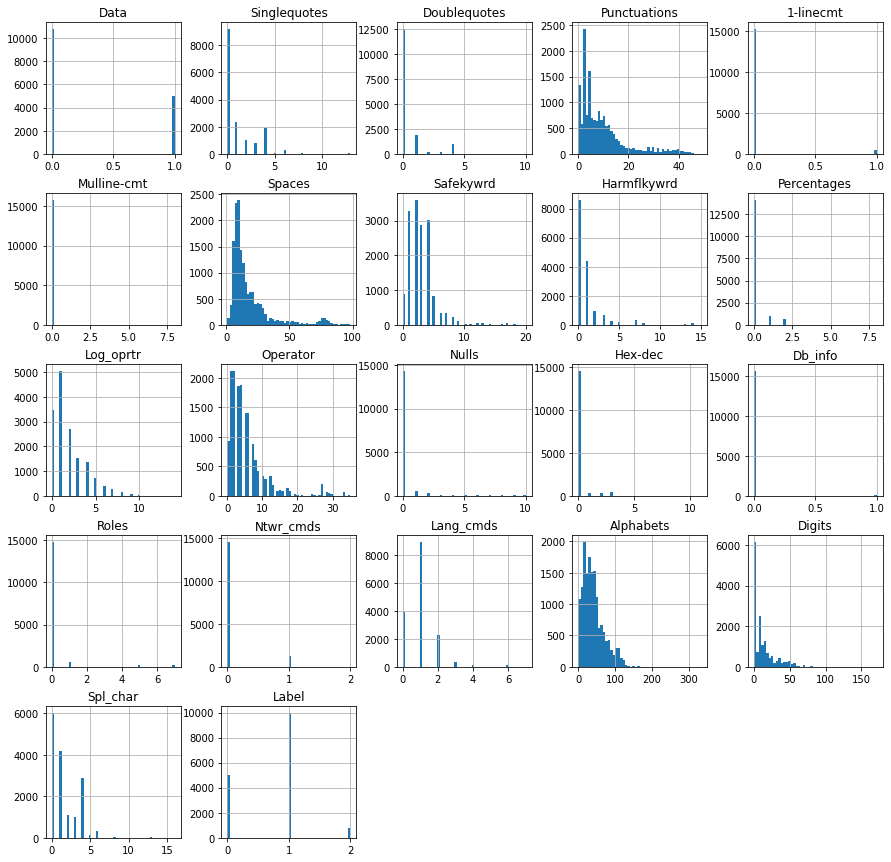

In [158]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

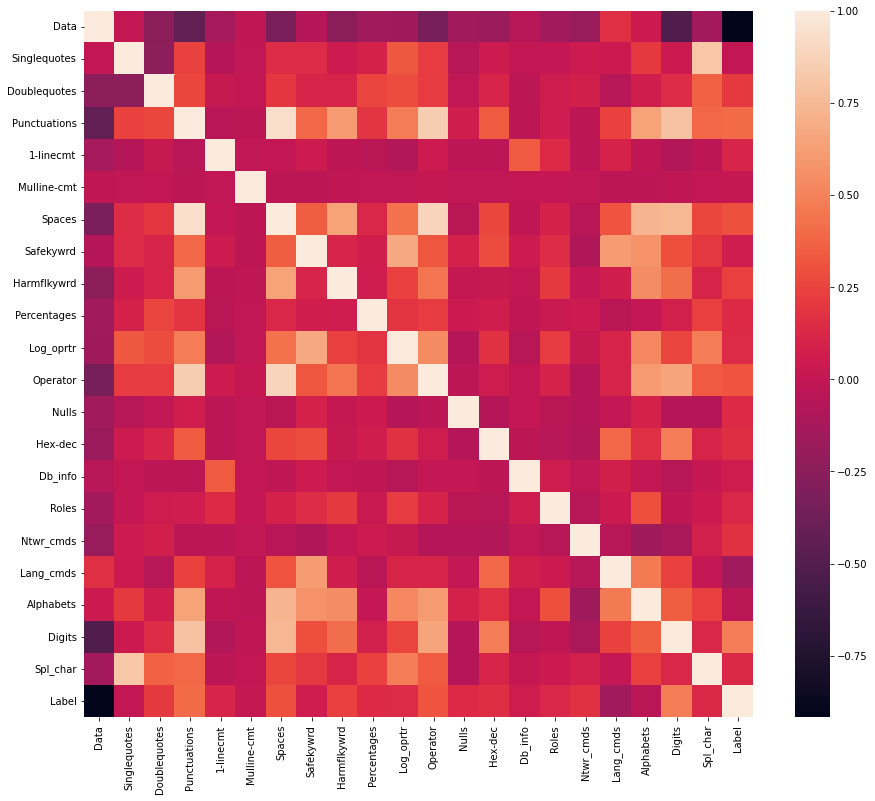

In [159]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [160]:
data0.describe()

,Data,Singlequotes,Doublequotes,Punctuations,1-linecmt,Mulline-cmt,Spaces,Safekywrd,Harmflkywrd,Percentages,...,Nulls,Hex-dec,Db_info,Roles,Ntwr_cmds,Lang_cmds,Alphabets,Digits,Spl_char,Label
count,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,...,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000
mean,0.316456,1.110063,0.442025,9.354114,0.033418,0.001962,18.493291,2.940633,1.060316,0.149873,...,0.303797,0.157152,0.005823,0.184367,0.078291,1.001962,40.566519,12.934747,1.559367,0.734177
std,0.465108,1.720586,1.070787,9.836655,0.179730,0.079135,17.575674,2.307879,2.113339,0.466153,...,1.291438,0.603951,0.076087,0.944432,0.268873,0.863086,29.011966,15.489077,1.805329,0.544468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,12.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.000000,9.000000,1.000000,1.000000
75%,1.000000,2.000000,0.000000,12.000000,0.000000,0.000000,22.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,18.000000,3.000000,1.000000
max,1.000000,13.000000,10.000000,49.000000,1.000000,8.000000,98.000000,20.000000,15.000000,8.000000,...,10.000000,11.000000,1.000000,7.000000,2.000000,7.000000,333.000000,171.000000,16.000000,2.000000


In [161]:
#Dropping the Query column
data = data0.drop(['Query'], axis = 1).copy()
#checking the data for null or missing values
data.isnull().sum()

Data            0
Singlequotes    0
Doublequotes    0
Punctuations    0
1-linecmt       0
Mulline-cmt     0
Spaces          0
Safekywrd       0
Harmflkywrd     0
Percentages     0
Log_oprtr       0
Operator        0
Nulls           0
Hex-dec         0
Db_info         0
Roles           0
Ntwr_cmds       0
Lang_cmds       0
Alphabets       0
Digits          0
Spl_char        0
Label           0
dtype: int64

In [162]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Data,Singlequotes,Doublequotes,Punctuations,1-linecmt,Mulline-cmt,Spaces,Safekywrd,Harmflkywrd,Percentages,...,Nulls,Hex-dec,Db_info,Roles,Ntwr_cmds,Lang_cmds,Alphabets,Digits,Spl_char,Label
0,0,0,0,40,0,0,76,2,9,0,...,2,0,0,0,0,1,115,43,0,2
1,0,4,0,20,0,0,32,3,0,0,...,0,0,0,0,0,0,52,16,4,1
2,0,0,0,0,0,0,2,3,0,0,...,0,0,0,0,0,1,11,0,0,1
3,0,6,0,17,0,0,26,4,1,0,...,0,0,0,0,0,1,47,23,6,1
4,1,0,0,3,0,0,9,1,2,0,...,0,0,0,0,0,1,39,0,0,0


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [163]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((15800, 21), (15800,))

In [164]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((12640, 21), (3160, 21))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
*Random Forest
*Adaboost
*XGBoost
*Gradient Boosting Machine
*Light Gradient Boosting Machine
*Autoencoder Neural Network
*Support Vector Machines

In [165]:
#importing packages
from sklearn.metrics import accuracy_score
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [166]:
# Decision Tree model 

from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [167]:

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [168]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.7f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.7f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9471519
Decision Tree: Accuracy on test Data: 0.9582278


**Storing the results:**

In [169]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [170]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [171]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [172]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.7f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.7f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.9470728
Random forest: Accuracy on test Data: 0.9585443


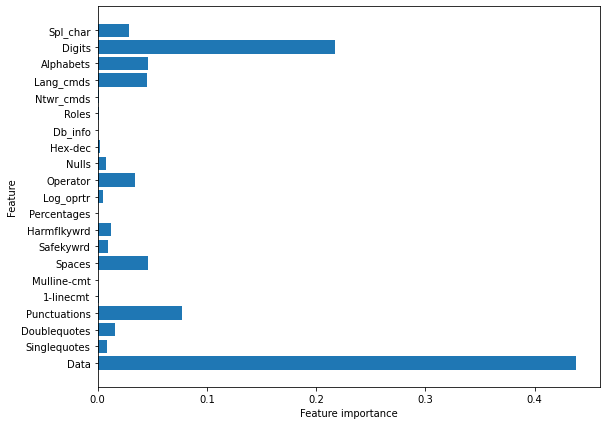

In [173]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [174]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [175]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7, objective='multi:softprob')

In [176]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [177]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.7f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.7f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.9508703
XGBoost : Accuracy on test Data: 0.9405063


**Storing the results:**

In [178]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.4. Autoencoder Neural Network**
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [179]:
#  Autoencoder Neural Network

#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [180]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_21 (Dense)            (None, 21)                462       
                                                                 
 dense_22 (Dense)            (None, 21)                462       
                                                                 
 dense_23 (Dense)            (None, 19)                418       
                                                                 
 dense_26 (Dense)            (None, 21)                420       
                                                                 
 dense_27 (Dense)            (None, 21)                462       
                                                                 
Total params: 2,224
Trainable params: 2,224
Non-trainable p

In [181]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.3) 

Epoch 1/10
139/139 [==============================] - 1s 4ms/step - loss: -56.2763 - accuracy: 0.0015 - val_loss: -60.4693 - val_accuracy: 0.0034
Epoch 2/10
139/139 [==============================] - 0s 3ms/step - loss: -60.4243 - accuracy: 0.0033 - val_loss: -61.1960 - val_accuracy: 0.0016
Epoch 3/10
139/139 [==============================] - 0s 2ms/step - loss: -60.7317 - accuracy: 0.0044 - val_loss: -61.3371 - val_accuracy: 0.0018
Epoch 4/10
139/139 [==============================] - 0s 2ms/step - loss: -60.4656 - accuracy: 0.0127 - val_loss: -61.1529 - val_accuracy: 5.2743e-04
Epoch 5/10
139/139 [==============================] - 0s 2ms/step - loss: -60.8874 - accuracy: 0.0278 - val_loss: -61.8111 - val_accuracy: 0.0894
Epoch 6/10
139/139 [==============================] - 0s 2ms/step - loss: -61.3333 - accuracy: 0.3790 - val_loss: -62.1211 - val_accuracy: 0.3136
Epoch 7/10
139/139 [==============================] - 0s 2ms/step - loss: -61.4448 - accuracy: 0.2484 - val_loss: -62.17

**Performance Evaluation:**

In [182]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.7f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.7f}' .format(acc_test_auto))

99/99 [==============================] - 0s 1ms/step - loss: -62.3612 - accuracy: 0.8456

Autoencoder: Accuracy on training Data: 0.8380538
Autoencoder: Accuracy on test Data: 0.8455696


**Storing the results:**

In [183]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### **7.5. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [184]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [185]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [186]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.7f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.7f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.9470728
SVM : Accuracy on test Data: 0.9585443


**Storing the results:**

In [187]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### **7.6. AdaBoost**

AdaBoost, short for Adaptive Boosting. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.

In [188]:

svc=SVC(probability=True, kernel='linear')
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
Adaboost = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.9)
# Train Adaboost Classifer
Adaboost= Adaboost.fit(X_train, y_train)


In [189]:

#Predict the response for test dataset
y_test_Adaboost = Adaboost.predict(X_test)
y_train_Adaboost = Adaboost.predict(X_train)

**Performance Evaluation:**

In [190]:
#computing the accuracy of the model performance
acc_train_Adaboost = accuracy_score(y_train,y_train_Adaboost)
acc_test_Adaboost = accuracy_score(y_test,y_test_Adaboost)

print("AdaBoost: Accuracy on training Data: {:.7f}".format(acc_train_Adaboost))
print("AdaBoost : Accuracy on test Data: {:.7f}".format(acc_test_Adaboost))

AdaBoost: Accuracy on training Data: 0.9470728
AdaBoost : Accuracy on test Data: 0.9585443


**Storing the results:**

In [191]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Adaboost', acc_train_Adaboost, acc_test_Adaboost)

### **7.7. Light Gradient Boosting Machine**

It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks. The development focus is on performance and scalability.LightGBM has many of XGBoost's advantages but major difference between the two lies in the construction of trees. LightGBM does not grow a tree level-wise — row by row — as most other implementations do. Instead it grows trees leaf-wise. It chooses the leaf it believes will yield the largest decrease in loss.

In [192]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [193]:
#Predict the response for test dataset
y_test_lgbm = lgbm.predict(X_test)
y_train_lgbm = lgbm.predict(X_train)

**Performance Evaluation:**

In [194]:
#computing the accuracy of the model performance
acc_train_lgbm = accuracy_score(y_train,y_train_lgbm)
acc_test_lgbm = accuracy_score(y_test,y_test_lgbm)

print("lgbm: Accuracy on training Data: {:.7f}".format(acc_train_lgbm))
print("lgbm : Accuracy on test Data: {:.7f}".format(acc_test_lgbm))

lgbm: Accuracy on training Data: 0.9473892
lgbm : Accuracy on test Data: 0.9569620


**Storing the results:**

In [195]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LightGBM', acc_train_lgbm, acc_test_lgbm)

### **7.8. Gradient boosting**

Gradient boosting is a machine learning technique used in regression and classification tasks,. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
# fit the model on the whole dataset
Gbm = GradientBoostingClassifier()
Gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [197]:
#Predict the response for test dataset
y_test_Gbm = Gbm.predict(X_test)
y_train_Gbm = Gbm.predict(X_train)

**Performance Evaluation:**

In [198]:
#computing the accuracy of the model performance
acc_train_Gbm = accuracy_score(y_train,y_train_Gbm)
acc_test_Gbm = accuracy_score(y_test,y_test_Gbm)

print("Gbm: Accuracy on training Data: {:.7f}".format(acc_train_Gbm))
print("Gbm : Accuracy on test Data: {:.7f}".format(acc_test_Gbm))

Gbm: Accuracy on training Data: 0.9472310
Gbm : Accuracy on test Data: 0.9572785


**Storing the results:**

In [199]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Gradient Boosting', acc_train_Gbm, acc_test_Gbm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [200]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.947,0.958
1,Random Forest,0.947,0.959
2,XGBoost,0.951,0.941
3,AutoEncoder,0.838,0.846
4,SVM,0.947,0.959
5,Adaboost,0.947,0.959
6,LightGBM,0.947,0.957
7,Gradient Boosting,0.947,0.957


In [201]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.947,0.959
4,SVM,0.947,0.959
5,Adaboost,0.947,0.959
0,Decision Tree,0.947,0.958
6,LightGBM,0.947,0.957
7,Gradient Boosting,0.947,0.957
2,XGBoost,0.951,0.941
3,AutoEncoder,0.838,0.846


For the above comparision, it is clear that the RandomForest Classifier works well with this dataset.

So, saving the model for future use.

In [202]:
# save RandomForest model to file
import pickle
pickle.dump(forest, open("ForestClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In [203]:
# load model from file
loaded_model = pickle.load(open("ForestClassifier.pickle.dat", "rb"))
loaded_model

RandomForestClassifier(max_depth=5)

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/